# Avocado Project
### Problem Statement:
#### Avocado is a fruit consumed by people heavily in the United States. 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Setting style and color palette
sns.color_palette("Set2")
sns.set_style("whitegrid")

### Uploading data

In [3]:
# Uploading csv format of data
df =pd.read_excel("avocado.xlsx")
# Reading the data
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.columns

Index([  'Unnamed: 0',         'Date', 'AveragePrice', 'Total Volume',
                 4046,           4225,           4770,   'Total Bags',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year',       'region'],
      dtype='object')

Columns in dataset are:-
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [5]:
# We are renaming columns because system is considering them as number rather than columns.
df.rename(columns={4046:'4046',4225:'4225',4770:'4770'},inplace=True)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Let's check number of rows and columns in our data
print("We have {} rows  and {} columns in our dataset.".format((len(df)),(len(df.columns))))

We have 1517 rows  and 14 columns in our dataset.


In [8]:
# Let's check the data type
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

`Our data contains float, integer ,datetime and object type of data.`

In [9]:
# Let's check full information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   int64         
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   int64         
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 166.0+ KB


`In dataset we contains 0 to 1517 rows and total 14 columns`.

`Dataset is composed of 4 types of datatype-`
* `float -9columns`
* `object - 2columns`
* `integer -2columns`
* `datetime -1column`

In [10]:
# Checking null values

if df.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

There is no null values in dataset


In [11]:
# Let's check the duplicate values in data
if df.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [12]:
# Let's drop unwanted column Unnamed:0
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:


# Extracting month from the date column
df['Month']=df['Date'].apply(lambda x:x.month)

# Now drop date column
df=df.drop(['Date'],axis=1)

In [14]:
# checking the changes done in dataset
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [15]:
c=pd.DataFrame(df.groupby(['type','year'])['AveragePrice'].mean())
c

AveragePrice
type         year              
conventional 2015      1.060110
             2016      1.151498

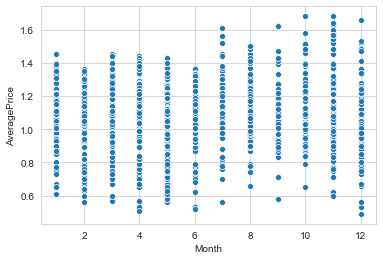

In [16]:
sns.scatterplot(x='Month',y='AveragePrice',markers=True,data=df)

##### In the end months of year ,there is high in prices of avocado or we can aalso say that there is huge difference in the average price in the end months of year.

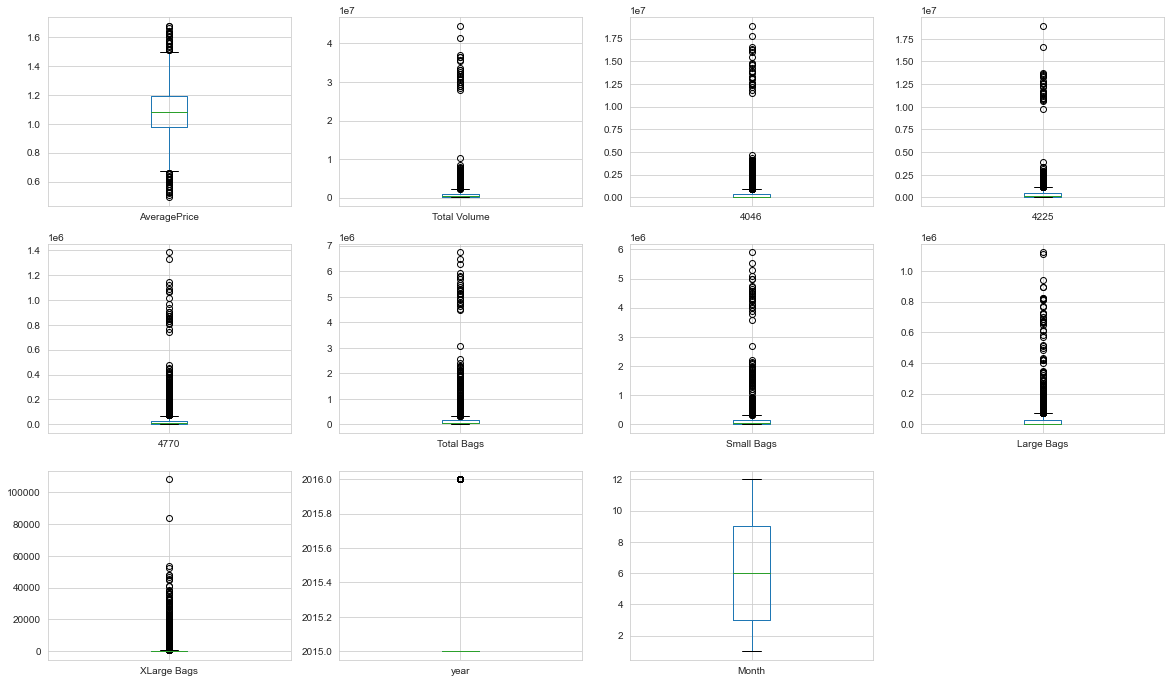

In [17]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16))
plt.show()

##### There a lot o outliers in our dataset, we need to remove them according to our model needs .

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [19]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

In [20]:
df.sample(20)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
476,0.77,983910.94,549415.32,309974.97,4231.47,120289.18,95546.28,24742.90,0.00,0,0,17,0
160,1.26,408485.16,3575.89,294164.23,106.09,110638.95,108644.33,1994.62,0.00,0,0,4,3
1461,1.34,5375978.50,2021375.04,1750074.56,123430.31,1481098.59,1379624.20,74894.96,26579.43,0,1,6,9
486,1.30,121767.82,5833.67,75495.03,4664.15,35774.97,22442.70,12428.29,903.98,0,0,18,1
1175,0.95,438581.50,262821.95,58036.49,773.09,116949.97,80513.03,36436.94,0.00,0,0,47,5
1332,1.34,59788.57,25832.98,3018.08,7311.55,23625.96,22909.91,622.44,93.61,0,1,3,9
1147,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.00,0,0,46,0
1222,0.92,5811260.29,2194373.38,2317428.16,136996.39,1162462.36,733843.93,428556.23,62.20,0,0,49,8
672,1.37,1515022.63,21741.70,1103694.97,1724.03,387861.93,322563.16,65288.42,10.35,0,0,26,4
627,1.11,140649.30,91537.59,7598.50,12377.93,29135.28,22422.52,6712.76,0.00,0,0,25,3


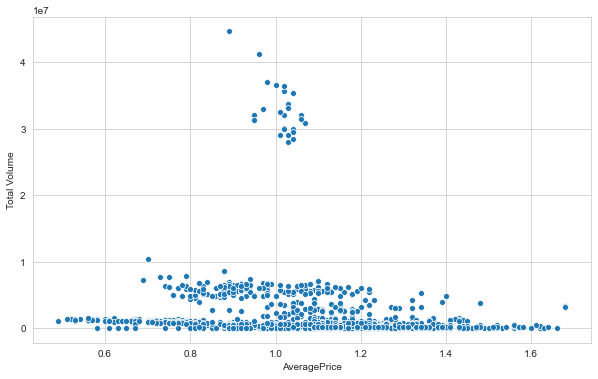

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.AveragePrice,y=df['Total Volume'])

###### There is a more concentraion in higher AveragePrice and low TotalVolume. It means hig average price is showing effect on volume .


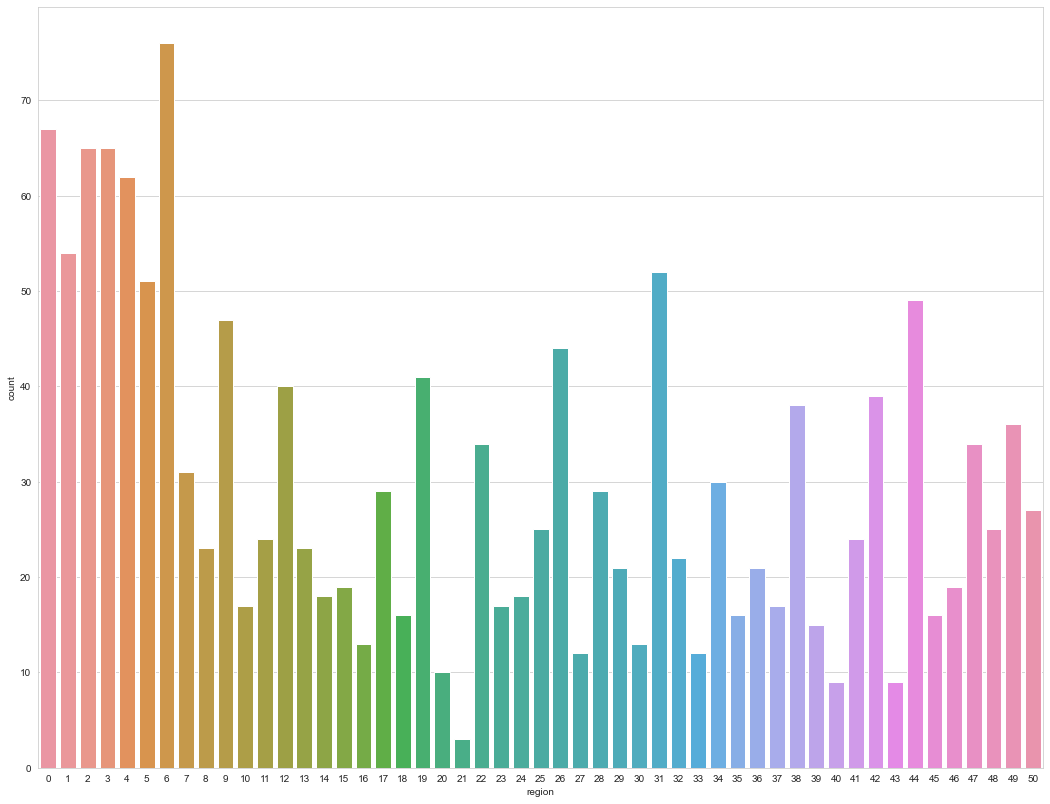

In [22]:
plt.figure(figsize=(18,14))
sns.countplot(df['region'])

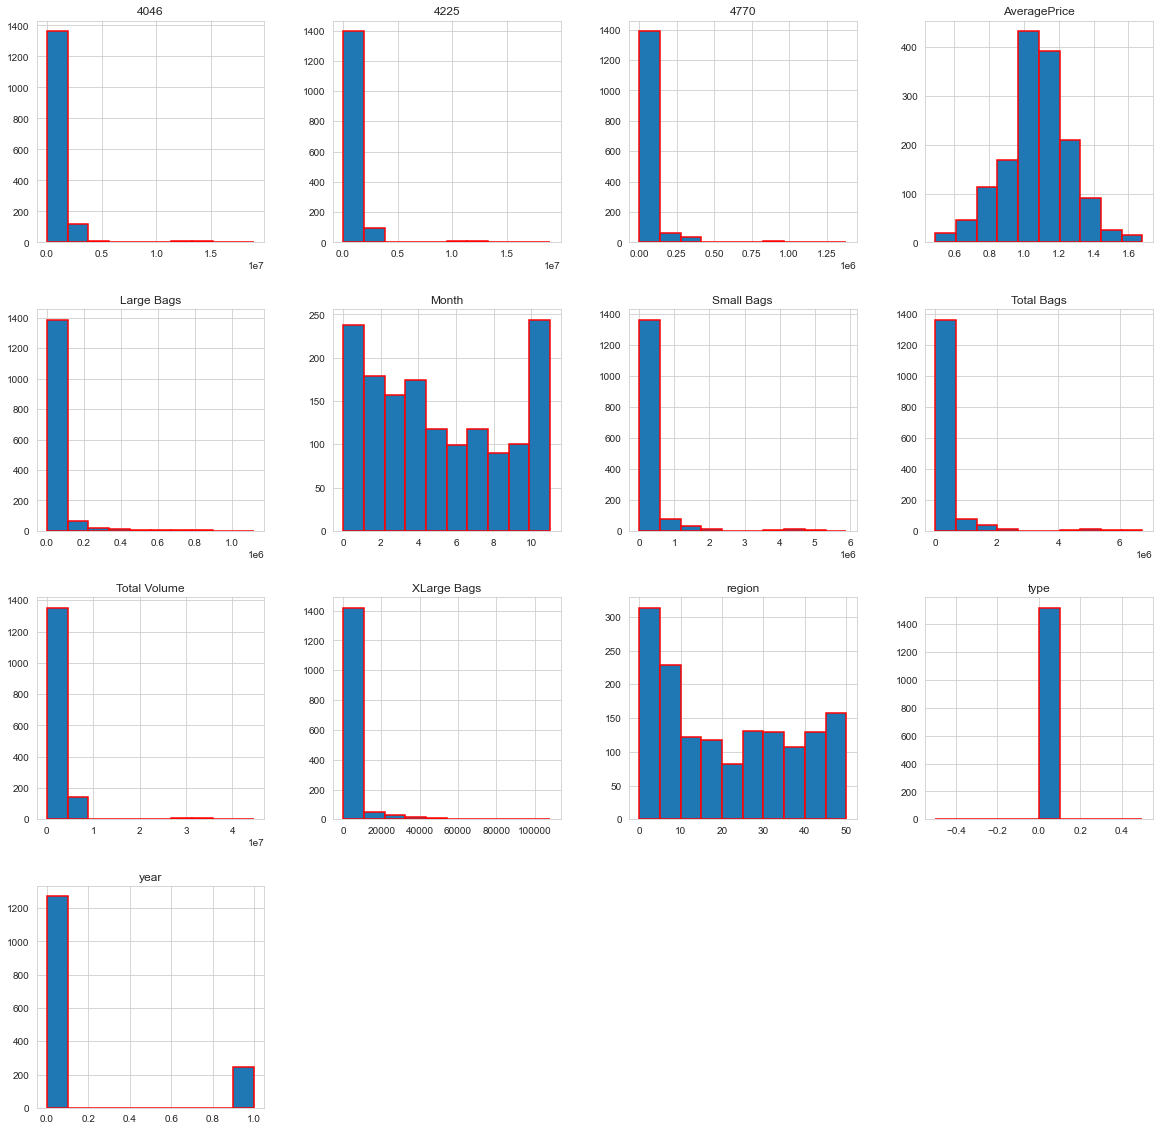

In [23]:
df.hist(layout=(4,4),edgecolor="red",linewidth= 1.5,figsize=(20,20),bins=10,grid=True)
plt.show()

#### Dataset contains a lot of skewness in many columns .This to be treated before sending data into algorithm. Except the categorical features all other features contains skewness.

In [24]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [25]:
from scipy.stats import skew

In [26]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

In [27]:
#Removing skewness
for i in df.columns:
    if df[i].skew()>0.5:
        df[i]=np.log1p(df[i])
    if df[i].skew()<0.5:
        df[i]=np.sqrt(df[i])

In [28]:
df.skew()

AveragePrice   -0.460428
Total Volume    0.667468
4046           -0.385287
4225            0.003666
4770           -0.789308
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -1.903957
XLarge Bags     0.783913
type            0.000000
year            1.828332
region         -0.273328
Month          -0.623244
dtype: float64

In [29]:
from scipy.stats import zscore
z =np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 760,  761,  763,  785,  787,  788,  789,  790,  795,  796,  807,
       1141, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1343, 1345, 1346], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1,
       5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5, 5, 1, 4, 4, 4], dtype=int64))


In [30]:
df_new= df[(z<3).all(axis=1)]

In [31]:
df.shape,df_new.shape

((1517, 13), (0, 13))

#### So we can see that our dataset is composed of irrelevant data which contians outliers a lot that we cannot usee outliers techniques.

### Splitting dependent and independent variables

In [32]:

y=df[['AveragePrice']]
x=df.drop(['AveragePrice','type'],axis=1)

In [33]:
x.features=x.columns

In [34]:
x.shape, y.shape

((1517, 11), (1517, 1))

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)

In [36]:
x=pd.DataFrame(X,columns=x.features)
x.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,-1.356762,-1.942996,-0.542825,-1.929204,-1.684725,-1.539248,-0.543159,-0.810775,-0.441008,-2.028672,1.366722
1,-1.466387,-2.174679,-0.664989,-1.829752,-1.620123,-1.474983,-0.532160,-0.810775,-0.441008,-2.028672,1.366722


### Splitting data  into training and testing

In [37]:

x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=.25,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso,LassoCV,RidgeCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=14, random_state=0).fit(x_train, y_train)
print("training set score : {:.2f}".format(tree.score(x_train, y_train)))
print("test set score: {:.2f}".format(tree.score(x_test, y_test)))
pred=tree.predict(x_test)
print("R2 score :{:.2f}".format(r2_score(y_test,pred)))

print("\n", "feature importances:")
feature_importance = pd.DataFrame(list(x.keys()), tree.feature_importances_)
print(feature_importance.sort_index(ascending=False))

training set score : 1.00
test set score: 0.73
R2 score :0.73

 feature importances:
                     0
0.412157          4046
0.137342    Total Bags
0.098600  Total Volume
0.066419          4770
0.063291    Large Bags
0.062047          year
0.046819          4225
0.038450         Month
0.034423        region
0.031411    Small Bags
0.009040   XLarge Bags


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), 
        SVR(), KNeighborsRegressor(), DecisionTreeRegressor(),
         RandomForestRegressor()]

In [42]:
# finding best random state
max_r2=0
max_rstate=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=.25,random_state=i)
    tree=DecisionTreeRegressor()
    tree.fit(x_train,y_train)
    pred=tree.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r2:
        max_r2=r2
        max_rstate=i
print("MAximum r2 score {:.2f} at random state {}".format(max_r2,max_rstate))

MAximum r2 score 0.82 at random state 432


In [43]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
r2=[]

for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=.25,random_state=432)
    m.fit(x_train,y_train)
    print("Score of ",m,"is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    
    pred=m.predict(x_test)
    print("mean absolute error is",mean_absolute_error(y_test,pred))
    mean_abs_e.append(mean_absolute_error(y_test,pred))
    print("mean squared error is",mean_squared_error(y_test,pred))
    mean_sqr_e.append(mean_squared_error(y_test,pred))
    print("R2 score is : ",r2_score(y_test,pred))
    r2.append(r2_score(y_test,pred))
    print("\n")

Score of  LinearRegression() is  0.37297773235670906
mean absolute error is 0.05686459505191435
mean squared error is 0.00562270115601888
R2 score is :  0.3821478157813758


Score of  Lasso() is  0.0
mean absolute error is 0.07213670629173481
mean squared error is 0.009102342267946378
R2 score is :  -0.00021357986205772228


Score of  Ridge() is  0.3728318376956431
mean absolute error is 0.05687346044656992
mean squared error is 0.00563187781301579
R2 score is :  0.38113943610547996


Score of  ElasticNet() is  0.0
mean absolute error is 0.07213670629173481
mean squared error is 0.009102342267946378
R2 score is :  -0.00021357986205772228


Score of  SVR() is  0.6386646196627568
mean absolute error is 0.047171575641169944
mean squared error is 0.003255350217081318
R2 score is :  0.6422848758612717


Score of  KNeighborsRegressor() is  0.8527305306848315
mean absolute error is 0.034938416117500065
mean squared error is 0.0021539412430620353
R2 score is :  0.7633135276485628


Score of  D

In [44]:
mean_score=[]
STD=[]
cv=[]

for m in(models):
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Cross validation mean score of {} is {:.2f}".format(m,score.mean()))
    mean_score.append(score.mean())
    print("and standard deviation is {:.4f}".format(score.std()))
    STD.append(score.std())
    print(score)
    print("\n")

Cross validation mean score of LinearRegression() is 0.07
and standard deviation is 0.1479
[-0.15188395  0.08955577  0.30406189  0.08991037  0.00164416]


Cross validation mean score of Lasso() is -0.04
and standard deviation is 0.0514
[-0.14184232 -0.01083338 -0.01954833 -0.01738703 -0.00737263]


Cross validation mean score of Ridge() is 0.07
and standard deviation is 0.1438
[-0.14030174  0.08773265  0.30208547  0.08448969  0.00098922]


Cross validation mean score of ElasticNet() is -0.04
and standard deviation is 0.0514
[-0.14184232 -0.01083338 -0.01954833 -0.01738703 -0.00737263]


Cross validation mean score of SVR() is 0.26
and standard deviation is 0.0977
[0.19623475 0.33229873 0.37393024 0.2840731  0.10211295]


Cross validation mean score of KNeighborsRegressor() is 0.07
and standard deviation is 0.1292
[ 0.0718377  -0.05041202 -0.03560492  0.07663431  0.31065109]


Cross validation mean score of DecisionTreeRegressor() is -0.42
and standard deviation is 0.4321
[-1.16563876 -

##### We are considering SVR as best model for our dataset as it is given more accurate results while checking for testing and training and also giving better results than other using cross validation technnique .

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid={"kernel":["linear",'rbf','sigmoid','poly'],
           "gamma":['scale','auto']}
svr=SVR()
gscv = GridSearchCV(estimator=svr,param_grid=param_grid,cv=8)
gscv.fit(x_train,y_train)
print(gscv.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
svr = SVR(gamma= 'scale', kernel= 'rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred=svr.predict(x_test)
print("R2Score ",r2_score(y_test,pred))

0.6386646196627568
R2Score  0.6422848758612717


In [48]:
score=cross_val_score(svr,x,y,cv=5,scoring='neg_mean_squared_error')
score.mean()

-0.006421527919562677

### Saving model

In [49]:
import joblib
filename="avocado.obj"
joblib.dump(svr,filename)

['avocado.obj']

In [50]:
# Loading model
model=joblib.load(filename)


In [51]:
conclusion=pd.DataFrame([model.predict(x_test),y_test],index=["Predicted","Original"])

## Conclusion

In [52]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
Predicted,1.10472,0.895233,1.08318,1.07087,0.913199,1.06723,0.988473,1.01414,1.0516,1.14925,...,1.15145,1.0628,1.03647,1.01788,0.998137,1.02863,1.04284,1.05964,1.06648,1.0333
Original,[1.0908712114635715],[0.9433981132056604],[1.140175425099138],[1.1090536506409416],[0.7810249675906654],[1.03440804327886],[1.02469507659596],[1.0908712114635715],[0.9797958971132712],[1.1575836902790226],...,[1.2124355652982142],[1.0630145812734648],[0.99498743710662],[0.9848857801796105],[1.0954451150103321],[1.0],[1.1135528725660044],[1.0862780491200215],[0.9643650760992956],[0.9899494936611666]


So here we can conclude that by using different and different methods now we are in position to do prediction,and prediction done by our model is quite good as there is less error in predicted and original result.